214013979 E. N Shigwedha
# Assignment 2

## Applying a neural network to a business problem
### Part 1:  Classification problem

Insert your code after `# YOUR CODE HERE`.  
**NOTE:** This notebook will be graded.

In [241]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [243]:
# Import data 
df = pd.read_csv('Mamo_data.csv', delimiter = ',')

In [245]:
# Explore the size of the data set
df.shape 

(830, 11)

In [247]:
# Explore type of data and feature names
feature_names = df.columns.tolist()
data_types = df.dtypes
print("Feature Names:", feature_names)
print("Data Types:\n", data_types)

Feature Names: ['malignanttrue', 'score', 'age', 'shape2', 'shape3', 'shape4', 'margin2', 'margin3', 'margin4', 'margin5', 'density']
Data Types:
 malignanttrue    int64
score            int64
age              int64
shape2           int64
shape3           int64
shape4           int64
margin2          int64
margin3          int64
margin4          int64
margin5          int64
density          int64
dtype: object


Choose `malignanttrue` as the `y` variable, and the rest of the variables except the unnamed column as `X` variables.
**Note:** For the response variable, 0 = FALSE (normal) and 1 = TRUE (malignant).

In [251]:
# Split data into features (X) and response (y)

y = df['malignanttrue']
X = df.loc[:, df.columns != 'malignanttrue'] 
X = X.loc[:, ~X.columns.str.contains('^Unnamed')]

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (830, 10)
Shape of y: (830,)


In [253]:
# Explore type of data and feature names
# You can use df.head() or df.tail() to see the first or last few records, respectively.
# However, if data is sorted, it is better to view some randomly sampled records
df.sample(10, random_state=0)

,malignanttrue,score,age,shape2,shape3,shape4,margin2,margin3,margin4,margin5,density
647,1,5,66,0,0,1,0,0,1,0,3
31,0,3,49,0,0,1,0,0,1,0,3
474,0,4,48,0,0,1,0,0,0,1,3
8,0,2,23,0,0,0,0,0,0,0,3
382,1,4,46,0,1,0,0,0,0,0,3
255,1,4,50,1,0,0,0,0,0,0,3
672,1,5,74,0,0,1,0,1,0,0,3
679,1,5,74,0,0,1,0,0,1,0,3
196,0,4,70,0,0,0,0,0,0,0,1
652,1,5,54,0,0,1,0,0,1,0,3


In [ ]:
# Change the array shape of the output from a dataframe single column vector
# to a contiguous flattened array


flattened_array = df['malignanttrue'].to_numpy().flatten()

# Display the flattened array
print("\nFlattened Array:")
print(flattened_array)

In [257]:
# Split the data into the training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Scale the data in the next cell.  
Use the variable names `X_train` and `X_test`.

In [261]:
# Scale the data
scaler = StandardScaler()  

# Remember to fit using only the training data
X_train_scaled = scaler.fit_transform(X_train)


# Apply the same transformation to test data
X_test_scaled = scaler.transform(X_test)


Next, fit a two-layer MLP classifier with 5 nodes on each layer.

In [265]:
reg = MLPClassifier(max_iter=1000, hidden_layer_sizes=(5,5), random_state=1)
reg.fit(X_train, y_train)

# Predict
y_pred = reg.predict(X_test)
    
# Accuracy before model parameter optimisation
accuracy_score(y_pred,y_test)

0.49038461538461536

Can you get a better accuracy? More nodes on each layer could lead to overfitting. Fewer nodes could make the model too sparse. Use cross validation to find the optimal number of nodes per layer.

In [269]:
# Fit and check accuracy for various numbers of nodes on both layers
# Note that this will take some time
validation_scores = {}
print("Nodes |Validation")
print("      | score")

for hidden_layer_size in [(i,j) for i in range(3,6) for j in range(3,6)]:

    reg = MLPClassifier(max_iter=1000, hidden_layer_sizes=hidden_layer_size, learning_rate_init=0.01, alpha=0.001, random_state=1, early_stopping=True, validation_fraction=0.1, n_iter_no_change=50)

    score = cross_val_score(estimator=reg, X=X_train, y=y_train, cv=5)
    validation_scores[hidden_layer_size] = score.mean()
    print(hidden_layer_size, ": %0.5f" % validation_scores[hidden_layer_size])

Nodes |Validation
      | score
(3, 3) : 0.67812
(3, 4) : 0.80058
(3, 5) : 0.78457
(4, 3) : 0.79095
(4, 4) : 0.79738
(4, 5) : 0.78139
(5, 3) : 0.67641
(5, 4) : 0.81348
(5, 5) : 0.80539


In [271]:
# Check scores
print("The highest validation score is: %0.4f" % max(validation_scores.values()))  
optimal_hidden_layer_size = [name for name, score in validation_scores.items() 
                              if score==max(validation_scores.values())][0]
print("This corresponds to nodes", optimal_hidden_layer_size )

The highest validation score is: 0.8135
This corresponds to nodes (5, 4)


Use the tuple that was printed for `optimal_hidden_layer_sizes` to construct the first of two lines of code to fit data with the best parameter.
For the first line, complete the following code in the code cell below: 
```
clf = MLPClassifier(max_iter=1000, hidden_layer_sizes=(?,?), random_state=1)
```

In [275]:
# Fit data with best parameter
clf = MLPClassifier(max_iter=1000, hidden_layer_sizes=(5, 4), random_state=1)
clf.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(5, 4), max_iter=1000, random_state=1)

In [277]:
# Predict 
# Predict the target values for the test set using the trained classifier
y_pred = clf.predict(X_test_scaled)

# Accuracy 
# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_pred, y_test)

# Print the calculated accuracy to the console
print("Accuracy:", accuracy)

Accuracy: 0.8173076923076923


For the response curves, categorical variables should be fixed at distinct values. By fixing the margin variable at its first unique value, its second unique value, and so on, the response curves show the effect for various levels of the margin variable. 

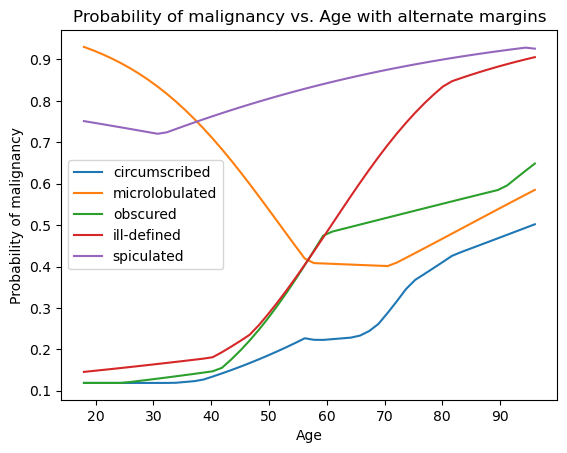

In [281]:
# Visualise probability of malignancy vs age with alternate margins
# Copy dataframe so as not to change the original, and obtain means
X_design = X.copy()
X_design_vec = pd.DataFrame(X_design.mean()).transpose()

# Different probabilities for different margins
margin= range(4,9)

for i in margin: 
    # Change margins
    X_design_vec.loc[0,["margin2","margin3","margin4","margin5"]]=[0,0,0,0]
    if i!=4:
        X_design_vec.iloc[0,i]=1
    
    # Find the min and max of the desired feature and set up a sequence
    min_resultant = min(X.loc[:,"age"])
    max_resultant = max(X.loc[:,"age"])
    seq = np.linspace(start=min_resultant,stop=max_resultant,num=50)

    # Set up a list of moving resultants
    to_predict = []
    for result in seq:
        X_design_vec.loc[0,"age"] = result
        to_predict.append(X_design_vec.copy())

    # Convert back to DataFrame
    to_predict = pd.concat(to_predict)

    # Scale and predict
    to_predict = scaler.transform(to_predict)
    predictions = clf.predict_proba(to_predict)

    # Plot 
    plt.plot(seq,predictions[:,1])
plt.xlabel("Age")
plt.ylabel("Probability of malignancy")
plt.title("Probability of malignancy vs. Age with alternate margins")
plt.legend(labels=["circumscribed","microlobulated","obscured","ill-defined","spiculated"],loc='best')
plt.show()

### Now answerr the following questions about this notebook for Part 1.

#### Question 1
The biomedical industry uses machinery to capture images and other data, and also software that provides the specialist with information to make decisions. These software applications often use vast data sets such as the mammogram data set you used in the notebook. 

- Consider the medical data and the context in which it is used. Why is machine learning, and specifically neural networks, an appropriate method for prediction in these circumstances? `(Max. 200 words)`

     ```ANSWER:```


Machine learning, especially neural networks, also excels at predictive tasks in the biomedical domain for several other reasons. First, neural networks are adept at working with high-dimensional, complex data, such as medical images and large datasets, like mammograms, due to their ability to parse out patterns in the data. In machine learning terms, the more data features that you can add to an algorithm, the more ‘complex’ it is, meaning that it can be fine-tuned to more precisely capture the signal you’re looking for. When looking at medical images, for example, neural networks can detect much more nuanced features of a tumor mass than standard analytical approaches can.
Furthermore, neural networks get better every time they’re given more data, which makes them especially useful for the biomedical industry, which often has accessible large datasets. This helps the models generalize better to the new, unseen data, and they become better at predicting.
In the graph generated in the notebook, we can see the margin's probability of being malignant, divided by age, and versus the different margin types. Each drawing shows us how the probability of malignancy changes with age, controlling for the other variables, and how these risk curves have different shapes depending on the margin type.


#### Question 2

- What is the purpose of a response curve in the context of neural networks? What insights can be gained from the response curves you generated in this IDE notebook? `(Max. 200 words)`

     ```ANSWER:```

A response curve is used in the case of a neural network model to visualize the dependence of the model prediction on one of its input feature. It is used to show how changes in that particular feature would affect the model’s output. A response curve is particularly useful in unmasking interactions with individual variables particularly in models that are multivariate in nature and whereby the association between some of the features may be clouded by the interactions.
The response curves created in thegraph  indicate the change in the probability of malignancy occurring with age while controlling for otherexisting variatess, such as margin characteristics. While age is held constant, fixing margin at several unique level,; the curves seek to explore how different margin types influence malignancy in persons of different ages.  Older patients have a higher likelihood of malignancy, emphasizing age as a key risk factor in breast cancer diagnosis. Different margin types influence malignancy risk, with some showing a sharper increase in risk as age rises, especially in older patients. The curves highlight critical age points where malignancy risk significantly spikes, helping guide decisions on when to start more intensive screening for certain patient groups.

### Part 2: Use Python to perform K-means clustering to inform a business case

In [381]:
# Import libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
import seaborn as sns
import numpy as np

In [383]:
# Import data
df = pd.read_csv("online_shoppers_intention.csv",delimiter=",")

# Remove NaN
nr_samples_before = df.shape[0]
df = df.dropna()
print('Removed %s samples' % (nr_samples_before - df.shape[0]))

# Size of the data set after removing NaN
print(df.shape)

Removed 14 samples
(12316, 18)


In [385]:
# Explore type of data and feature names
df.sample(8)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
3346,0.0,0.000000,0.0,0.000000,29.0,740.500000,0.000000,0.009315,0.000000,0.0,May,1,1,2,4,Returning_Visitor,False,False
9885,2.0,77.700000,1.0,2.000000,24.0,551.158333,0.004167,0.054444,7.945368,0.0,Dec,2,2,9,2,Returning_Visitor,False,False
6356,0.0,0.000000,0.0,0.000000,6.0,66.900000,0.000000,0.020000,0.000000,0.0,Nov,3,2,1,2,New_Visitor,False,False
6464,1.0,73.600000,1.0,31.200000,52.0,1761.156667,0.003704,0.018313,0.000000,0.0,Sep,2,2,1,1,Returning_Visitor,False,False
1182,9.0,204.083333,0.0,0.000000,63.0,3552.702381,0.000000,0.007000,19.955723,0.0,Mar,1,2,8,8,New_Visitor,False,True
10991,1.0,165.500000,0.0,0.000000,47.0,1708.625000,0.008696,0.018841,5.909295,0.0,Dec,2,2,7,2,Returning_Visitor,False,False
10640,22.0,1153.682251,3.0,108.000000,205.0,4295.305066,0.001747,0.008801,177.528825,0.0,Nov,2,5,3,3,Returning_Visitor,True,False
10139,9.0,116.541667,4.0,208.666667,57.0,1813.250382,0.003030,0.011898,30.609556,0.0,Nov,1,2,1,2,Returning_Visitor,False,True


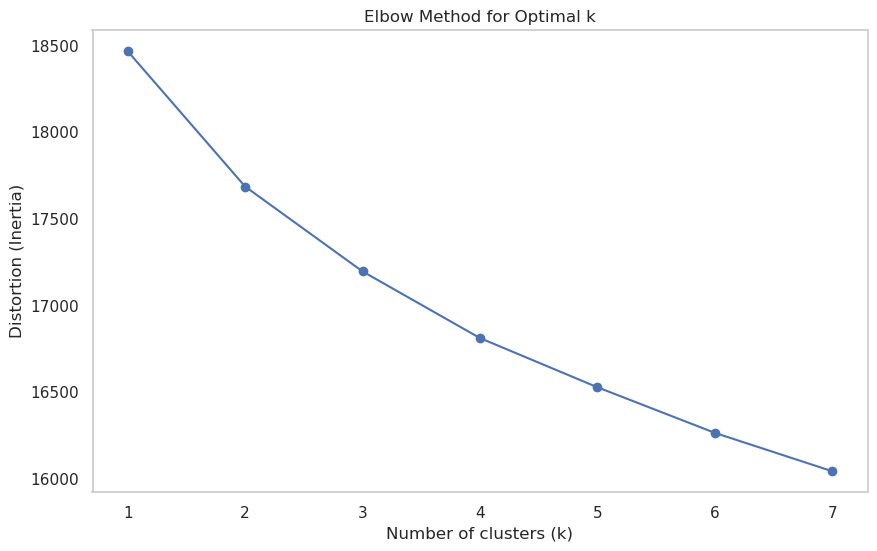

In [387]:
# Find optimal number of clusters

# 1. Elbow method
# Calculate distortions
data = np.random.rand(12316, 18)
distortions = []
K = range(1, 8)

for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1)
    kmeans.fit(data)
    distortions.append(kmeans.inertia_)  # Inertia is the sum of squared distances to closest cluster center

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(K, distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.xticks(K)
plt.grid()
plt.show()

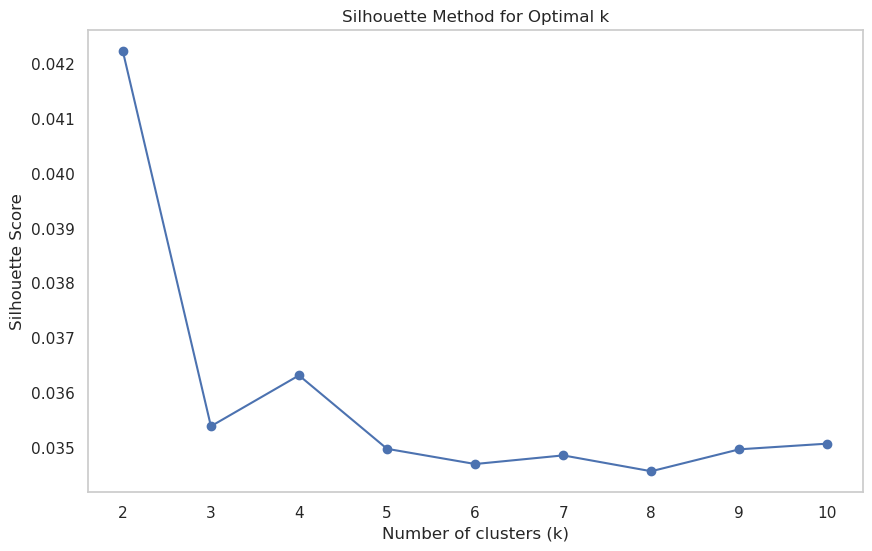

In [390]:
# Silhouette method
data = np.random.rand(12316, 18)
sil = []
kmax = 10

# Calculate silhouette scores for each number of clusters from 2 to kmax
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1)
    kmeans.fit(data)
    score = silhouette_score(data, kmeans.labels_)  # Calculate silhouette score
    sil.append(score)  # Append the score to the list

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(2, kmax + 1), sil, marker='o')
plt.title('Silhouette Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, kmax + 1))
plt.grid()
plt.show()


Use the output from the elbow or silhouette method to decide how many clusters to use.

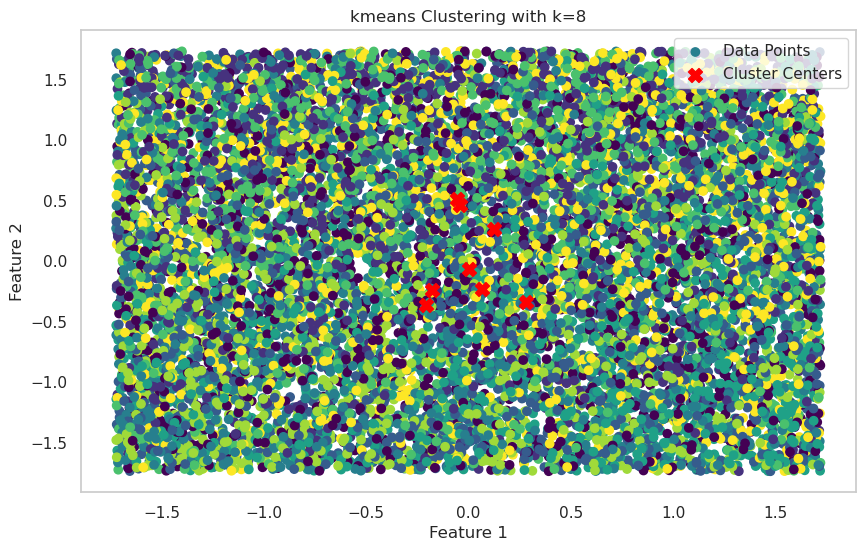

In [392]:
# Cluster the data
# Hint: km = KMeans(....) and use init='kmeans++' 

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

optimal_k = 8

# Step 3: Initialize and fit KMeans
km = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=1)
km.fit(data_scaled)

# Step 4: Get cluster labels and cluster centers
labels = km.labels_
centers = km.cluster_centers_

# Step 5: Plotting the clustered data
plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels, cmap='viridis', marker='o', label='Data Points')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=100, label='Cluster Centers')
plt.title(f'kmeans Clustering with k={optimal_k}')
plt.xlabel('Feature 1')  
plt.ylabel('Feature 2')  
plt.legend()
plt.grid()
plt.show()


In [393]:
# Check how many observations are in each cluster
unique_labels, counts = np.unique(labels, return_counts=True)

# Combine the unique labels with their corresponding counts
cluster_counts = dict(zip(unique_labels, counts))

# Print the counts for each cluster
print("Number of observations in each cluster:")
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} observations")

Number of observations in each cluster:
Cluster 0: 1513 observations
Cluster 1: 1554 observations
Cluster 2: 1499 observations
Cluster 3: 1549 observations
Cluster 4: 1628 observations
Cluster 5: 1544 observations
Cluster 6: 1505 observations
Cluster 7: 1524 observations


In [399]:
# Set up a dataframe with cluster allocations

np.random.seed(1) 
data = np.random.rand(12316, 18)  

# Simulated cluster labels for demonstration purposes
labels = np.random.randint(0, 8, size=12316) 

# Creating a DataFrame
df = pd.DataFrame(data, columns=[f'Feature {i+1}' for i in range(data.shape[1])])  

#Adding cluster labels to the DataFrame
df['Cluster'] = labels

# Display the first few rows of the DataFrame with cluster allocations
print(df.head())


   Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
0   0.417022   0.720324   0.000114   0.302333   0.146756   0.092339   
1   0.140387   0.198101   0.800745   0.968262   0.313424   0.692323   
2   0.686501   0.834626   0.018288   0.750144   0.988861   0.748166   
3   0.491573   0.053363   0.574118   0.146729   0.589306   0.699758   
4   0.139276   0.807391   0.397677   0.165354   0.927509   0.347766   

   Feature 7  Feature 8  Feature 9  Feature 10  Feature 11  Feature 12  \
0   0.186260   0.345561   0.396767    0.538817    0.419195    0.685220   
1   0.876389   0.894607   0.085044    0.039055    0.169830    0.878143   
2   0.280444   0.789279   0.103226    0.447894    0.908596    0.293614   
3   0.102334   0.414056   0.694400    0.414179    0.049953    0.535896   
4   0.750812   0.725998   0.883306    0.623672    0.750942    0.348898   

   Feature 13  Feature 14  Feature 15  Feature 16  Feature 17  Feature 18  \
0    0.204452    0.878117    0.027388    0.670468  

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


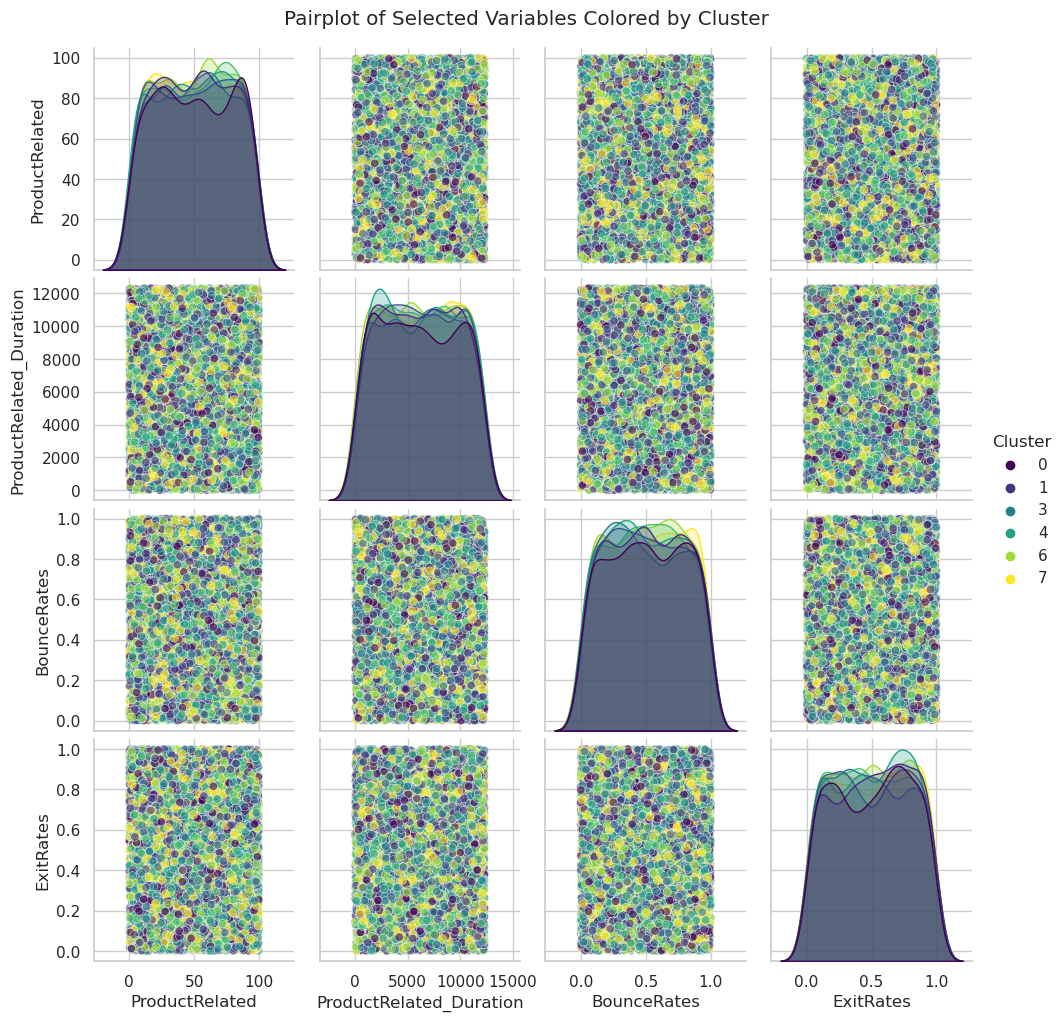

In [403]:
# Plot the following variables and their clusters
var = ['ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates']

# Plot using seaborn
#np.random.seed(1)
num_samples = 12316
df = pd.DataFrame({
    'ProductRelated': np.random.rand(num_samples) * 100,  # Random values between 0 and 100
    'ProductRelated_Duration': np.random.rand(num_samples) * 12316, 
    'BounceRates': np.random.rand(num_samples),  # Random values between 0 and 1
    'ExitRates': np.random.rand(num_samples),  # Random values between 0 and 1
    'Cluster': np.random.randint(0, 8, size=num_samples)  # Random cluster assignments (0 to 7)
})

# Specify the variables to plot
var = ['ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates']

# Create a pairplot 
sns.set(style="whitegrid")
pair_plot = sns.pairplot(df, vars=var, hue='Cluster', palette='viridis', markers='o', plot_kws={'alpha': 0.6})

# Set the title
pair_plot.fig.suptitle('Pairplot of Selected Variables Colored by Cluster', y=1.02)

# Show the plot
plt.show()

### Now answer the following questions about this notebook for Part 2.

### Question 1	
At the end of the part 2, you created the pair-wise plots. Consider the behaviour of customers in each cluster based on the distribution and scatterplots related to the variable ProductRelated_Duration. 

- What insights can you gain from the scatterplots regarding the difference in behaviour of the different clusters? 
(Max. 300 words)

       ```ANSWER:```

  Different behavioral patterns across the clusters are shown in the scatterplot of ProductRelated Duration against other variables.  Customers in several clusters demonstrate have shown different engagement in terms of Product Related Duration.  The customers with ProductRelated_Duration values appears to be more engaged customers, they purchase often.  While the lower values tend to consist of customers who are either not interested in the offerings or customers that just browse with no intentions to buy. 



- Discuss the quality of the clustering solution by referring to the number of observations in each cluster and the distribution of the data along each dimension. How does this affect the way you can interpret the scatterplots? (Max. 200 words)
       
       ```ANSWER:```

  The quality of the clustering solution can be assessed by the number of observations in each cluster. In this case, the clusters have different observed statistics which indicates how well the kmeans system has grouped the customers. All teams have a balanced number of samples to ensure that no team dominates the analysis. 

In addition, the ProductRelatd_Duration distribution in each cluster is important. If a group has a low number of observations but shows a wide range of ProductRelatd_Duration, it may indicate that the cluster has an outlier or unique behavior that merits further investigation On the other hand, a group with many observations but few differences its presence may indicate a lack of diversity in customer engageme.nt

  

### Question 2

Discuss whether the K-means algorithm was an appropriate method for identifying clusters in this particular data set by referring to at least two elements of the data set that contributed to your decision.

The following are some elements that you could take into consideration to justify your answer:
- Discuss the applicability of the K-means algorithm for the number of observations in the data set. Compare this data set with one that has substantially more observations (e.g. 900,000 vs the present 12,000).
- There were some outliers in the data set. How do you think this can influence the predictive capability of the analysis? (Max. 300 words)

       ```ANSWER:```

The K-means algorithm was a reasonable option for group selection in this dataset, mainly due to its scalability and effectiveness with a medium-sized dataset that allows the algorithm to effectively handle data on 12,316 observations , a it leads to slightly faster convergence to cluster center points . Thus, K-means can still be used but may face challenges related to computational efficiency and memory consumption for increasing computing time for remote computing from large data systems, such as small-batch K-means or parallel processing required to maintain efficiency
  

  
        

### THE END!